# Time Series 01

In [15]:
# Preface
rm(list=ls()) 
library(zoo)
library(dynlm)
library(forecast)

In [16]:
# load data and assign Time Series structure
cpi=read.csv("cpi.csv")
y = cpi[,2]
y = ts(y,start=c(1947,1),freq=4)     # defining as TS

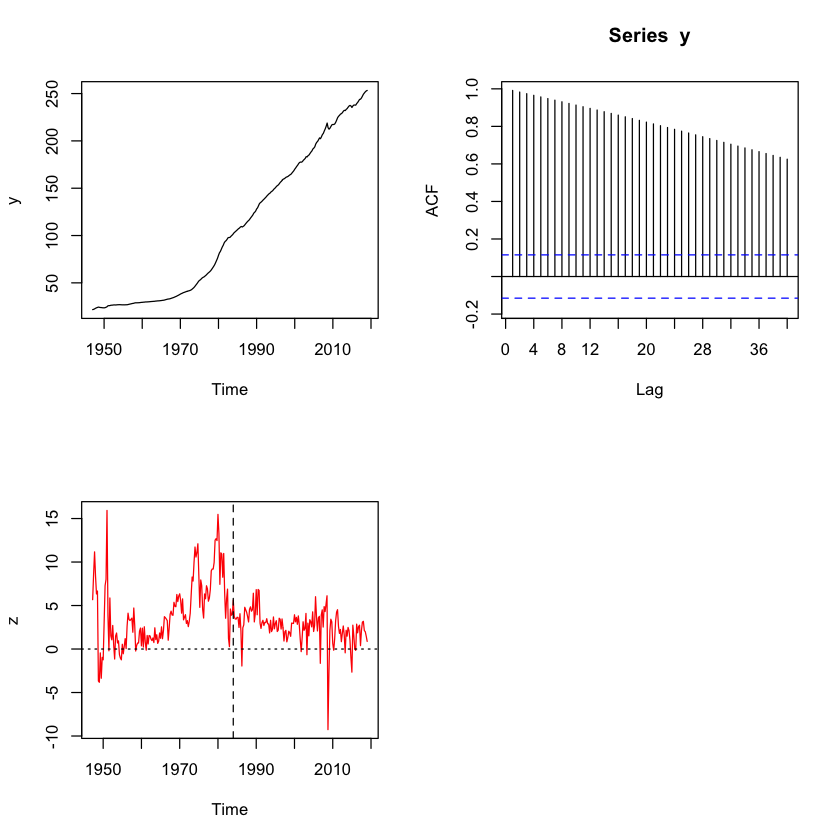

In [17]:
par(mfrow=c(2,2))
ts.plot(y)
Acf(y,lag.max=40)
z = 400*diff(log(y))                 # US-cpi inflation (400= 100%*4Q) yearly
ts.plot(z,col=2)             
abline(h=0,lty=3)
abline(v=c(1984,1),lty=2)            # Note: there is a structural break in 1984Q1    

In [18]:
# printing autocorrelations until lag 40
Acf(z,lag.max=40,plot=F) 


Autocorrelations of series ‘z’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.731 0.589 0.568 0.429 0.385 0.357 0.295 0.239 0.253 0.322 0.323 0.321 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.333 0.301 0.262 0.280 0.292 0.284 0.273 0.289 0.295 0.327 0.313 0.285 0.242 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.189 0.187 0.188 0.138 0.082 0.074 0.065 0.086 0.112 0.085 0.094 0.104 0.099 
   39    40 
0.125 0.112 


Autocorrelations of series ‘z’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.731 0.589 0.568 0.429 0.385 0.357 0.295 0.239 0.253 0.322 0.323 0.321 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.333 0.301 0.262 0.280 0.292 0.284 0.273 0.289 0.295 0.327 0.313 0.285 0.242 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.189 0.187 0.188 0.138 0.082 0.074 0.065 0.086 0.112 0.085 0.094 0.104 0.099 
   39    40 
0.125 0.112 

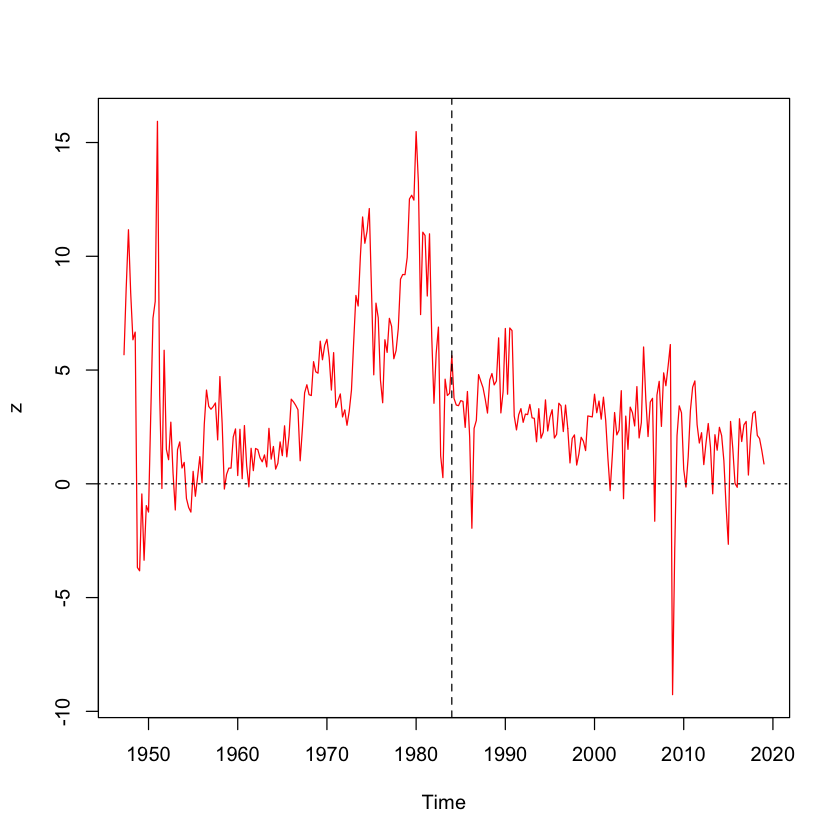

In [19]:
z = 400*diff(log(y))                 # US-cpi inflation (400= 100%*4Q) yearly
ts.plot(z,col=2)             
abline(h=0,lty=3)
abline(v=c(1984,1),lty=2)            # Note: there is a structural break in 1984Q1 
Acf(z,lag.max=40,plot=F)             # access the ACF directly


Time series regression with "ts" data:
Start = 1947(3), End = 2019(1)

Call:
dynlm(formula = z ~ L(z, 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6483  -1.1092   0.0119   1.0674   9.1614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.89966    0.18897   4.761 3.07e-06 ***
L(z, 1)      0.73219    0.04036  18.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.185 on 285 degrees of freedom
Multiple R-squared:  0.5359,	Adjusted R-squared:  0.5342 
F-statistic:   329 on 1 and 285 DF,  p-value: < 2.2e-16


[1] 1.000 0.732 0.536 0.393 0.287 0.210 0.154 0.113 0.083 0.060 0.044 0.032
[13] 0.024 0.017 0.013 0.009 0.007 0.005 0.004 0.003 0.002 0.001 0.001 0.001
[25] 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[37] 0.000 0.000 0.000 0.000 0.000


Time series regression with "ts" data:
Start = 1947(4), End = 2019(1)

Call:
dynlm(formula = z ~ L(z, c(1, 2)))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5986  -1.0967   0.0928   1.0629   9.1263 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.78096    0.19507   4.003 7.98e-05 ***
L(z, c(1, 2))1  0.63847    0.05873  10.872  < 2e-16 ***
L(z, c(1, 2))2  0.12429    0.05871   2.117   0.0351 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.165 on 283 degrees of freedom
Multiple R-squared:  0.5431,	Adjusted R-squared:  0.5399 
F-statistic: 168.2 on 2 and 283 DF,  p-value: < 2.2e-16


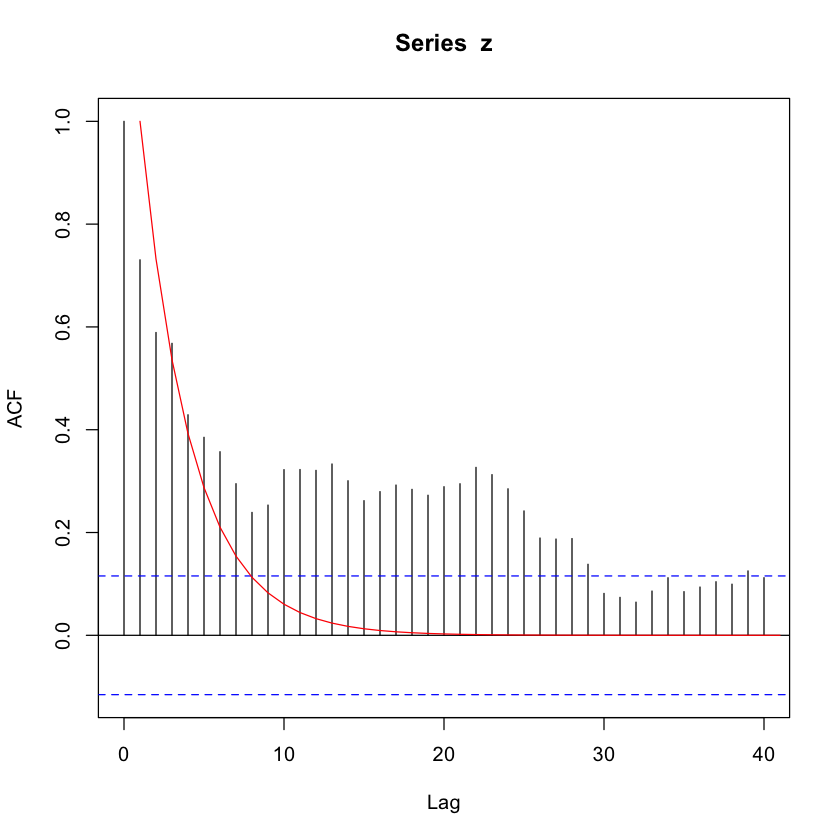

In [20]:
### AR(1) - Auto-regressive Regression model order 1
ar1.mod = dynlm(z ~ L(z,1))
summary(ar1.mod)
# red line => theoretical ACF of AR(1)
lags = seq(1:41)-1
round(ar1.mod$coef[2]^lags,3)
par(mfrow=c(1,1))
plot(Acf(z,lag.max=40,plot=F))
lines(ar1.mod$coef[2]^lags,col=2)
# AR(2)
ar2.mod = dynlm(z ~ L(z,c(1,2)))
summary(ar2.mod)

[1] 4.187205 2.605700

[1] 3.900059 1.955321

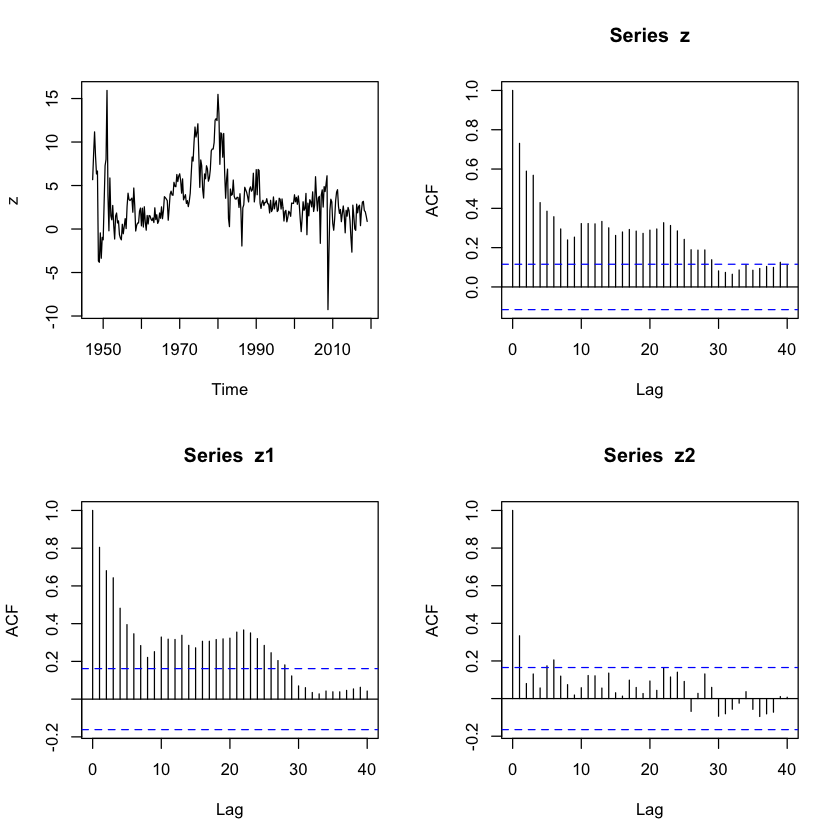

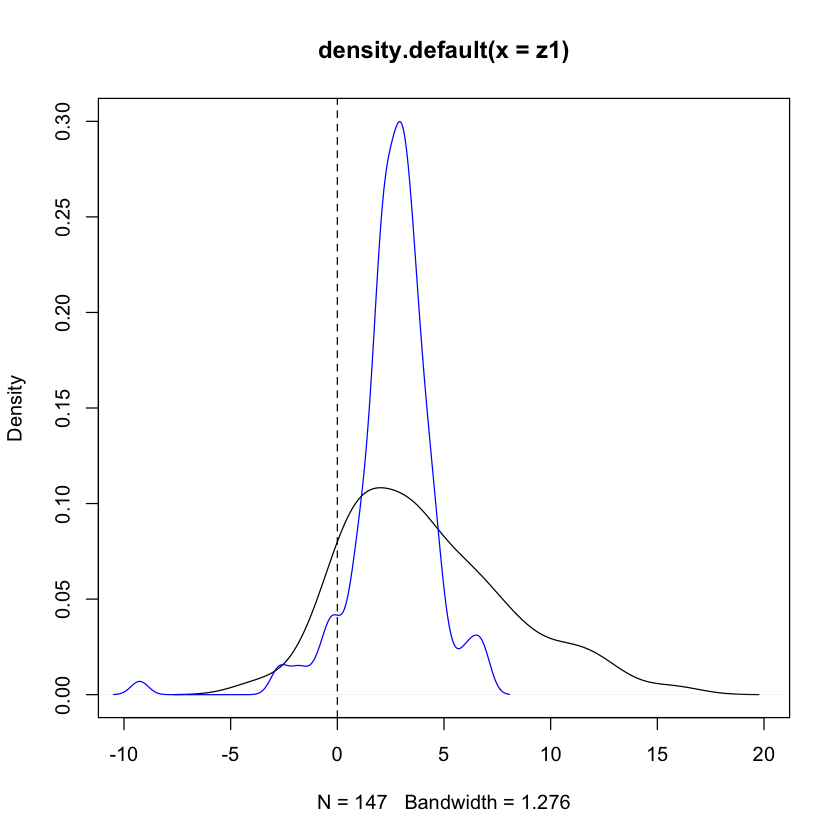

In [21]:
### Split the sample since we observe a structural break in the data 
#   Idea: before 1984Q1 high Variance, after 1984Q1 less Variance
#   Note: we still estimate with OLS, hence assume homoskecasticity

par(mfrow=c(2,2))
ts.plot(z)                        # ignore 2008Q4 for a moment
z1 = window(z,c(1947,2),c(1983,4))
z2 = window(z,c(1984,1),c(2019,1))
plot(Acf(z,lag.max=40,plot=F))
plot(Acf(z1,lag.max=40,plot=F))
plot(Acf(z2,lag.max=40,plot=F))
# compare means and sd
c(mean(z1),mean(z2))
c(sd(z1),sd(z2))
# compare densities
par(mfrow=c(1,1))
plot(density(z1),xlim=c(-10,20),ylim=c(0,0.3))
abline(v=0,lty=2)
lines(density(z2),xlim=c(-10,20),col=4)

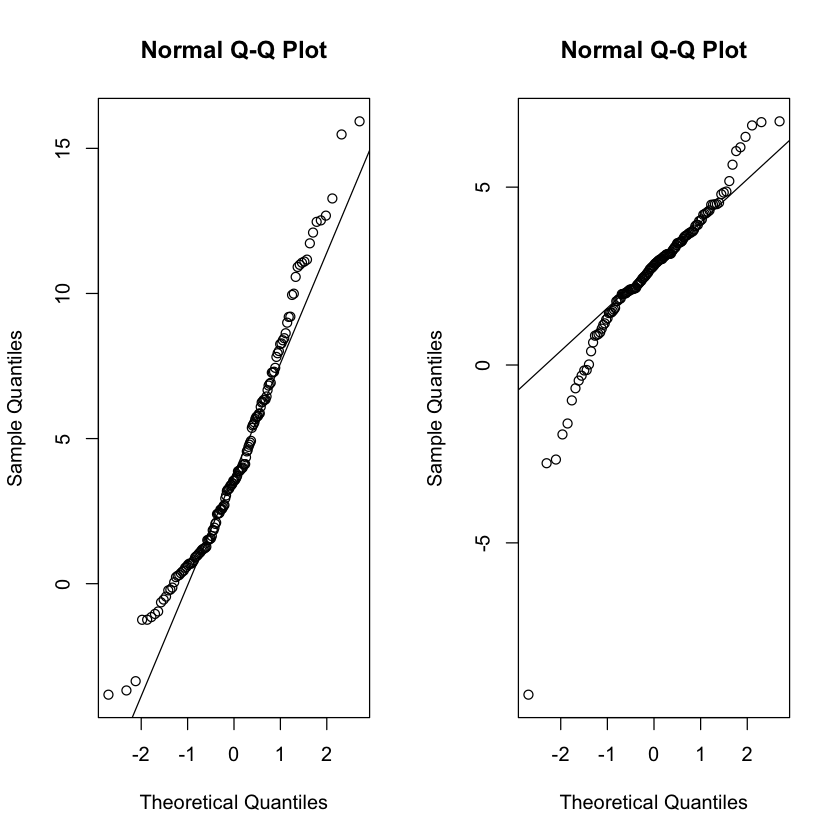

In [22]:
### Qantile - Quantile Plots
#   Handy tool to test whether your data is distributed as assumed
#   e.g. normally distributed
#   Why? This is important for further inference and to identify potential outliers
par(mfrow=c(1,2))
qqnorm(z1)
qqline(z1)
qqnorm(z2)
qqline(z2)